## The reversible Synthesis/Decomposition reaction `A + B <-> C`
#### with 1st-order kinetics for each species, taken to equilibrium.
#### Comparison of 2 approximate solutions and exact solutions 

### TAGS :  "uniform compartment", "numerical"

In [1]:
LAST_REVISED = "Sep. 8, 2024"
LIFE123_VERSION = "1.0.0.beta.38"      # Version this experiment is based on

In [2]:
#import set_path            # Using MyBinder?  Uncomment this before running the next cell!
                            # Importing this local file will add the project's home directory to sys.path

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

import pandas as pd
from life123 import check_version, UniformCompartment, ReactionDynamics, PlotlyHelper

In [4]:
check_version(LIFE123_VERSION)

OK


# 1. Run a simulation with low accuracy

### Initialize the System
Specify the chemicals, the reactions, and the initial concentrations

In [5]:
# Instantiate the simulator and specify the chemicals
# Here we use the "fast" preset for the variable steps, which leads to fewer steps, but generally less-accurate results
uc_fast = UniformCompartment(preset="fast")    

In [6]:
# Reaction A + B <-> C , with 1st-order kinetics for each species
uc_fast.add_reaction(reactants=["A" , "B"], products="C",
                     forward_rate=5., reverse_rate=2.)

uc_fast.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 5 / kR = 2 / delta_G = -2,271.4 / K = 2.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'C', 'B', 'A'}


In [7]:
# Set the initial concentrations of all the chemicals
uc_fast.set_conc({"A": 10., "B": 50., "C": 20.}, snapshot=True)

### Run the reaction

In [8]:
uc_fast.single_compartment_react(initial_step=0.004, duration=0.06, variable_steps=True)

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
23 total step(s) taken
Number of step re-do's because of elective soft aborts: 3
Norm usage: {'norm_A': 13, 'norm_B': 9, 'norm_C': 9, 'norm_D': 9}


In [9]:
df_fast = uc_fast.get_history()
df_fast

SYSTEM TIME          A          B          C            caption
0      0.000000  10.000000  50.000000  20.000000  Initialized state
1      0.000864   7.874560  47.874560  22.125440                   
2      0.001555   6.602265  46.602265  23.397735                   
3      0.002246   5.571266  45.571266  24.428734                   
4      0.002938   4.727594  44.727594  25.272406                   
5      0.003629   4.031746  44.031746  25.968254                   
6      0.004666   3.165305  43.165305  26.834695                   
7      0.005702   2.512652  42.512652  27.487348                   
8      0.006739   2.015898  42.015898  27.984102                   
9      0.007776   1.634842  41.634842  28.365158                   
10     0.008813   1.340804  41.340804  28.659196                   
11     0.009850   1.112883  41.112883  28.887117                   
12     0.010886   0.935595  40.935595  29.064405                   
13     0.011923   0.797321  40.797321  29.202679                   
14     0.013478   0.635211  40.635211  29.364789                   
15     0.015034   0.525833  40.525833  29.474167                   
16     0.016589   0.451805  40.451805  29.548195                   
17     0.018922   0.376490  40.376490  29.623510                   
18     0.021254   0.337393  40.337393  29.662607                   
19     0.024754   0.306871  40.306871  29.693129                   
20     0.030002   0.293965  40.293965  29.706035                   
21     0.037876   0.295437  40.295437  29.704563                   
22     0.049685   0.294082  40.294082  29.705918                   
23     0.067400   0.296969  40.296969  29.703031

### Plots changes of concentrations with time

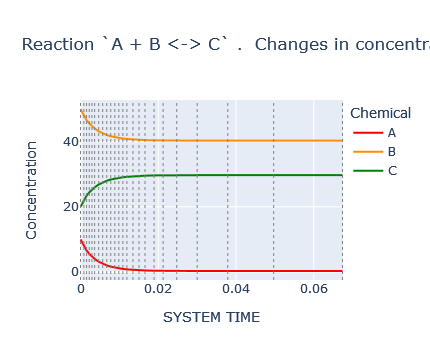

In [10]:
uc_fast.plot_history(colors=['red', 'darkorange', 'green'], show_intervals=True)

# 2. Let's now repeat the simulation with the "slow" preset, which yields more data points
### and, generally, more accuracy

In [11]:
# Instantiate the simulator and specify the chemicals
uc_slow = UniformCompartment(preset="slow")

In [12]:
# Reaction A + B <-> C , with 1st-order kinetics for each species
uc_slow.add_reaction(reactants=["A" , "B"], products="C",
                     forward_rate=5., reverse_rate=2.)

# Set the initial concentrations of all the chemicals
uc_slow.set_conc({"A": 10., "B": 50., "C": 20.}, snapshot=True)

In [13]:
uc_slow.single_compartment_react(initial_step=0.004, duration=0.06, variable_steps=True)

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
80 total step(s) taken
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 38, 'norm_B': 36, 'norm_C': 36, 'norm_D': 36}


### Note that **80 steps** were now used, instead of the earlier 23

In [14]:
df_slow = uc_slow.get_history()
df_slow

SYSTEM TIME          A          B          C            caption
0      0.000000  10.000000  50.000000  20.000000  Initialized state
1      0.000160   9.606400  49.606400  20.393600                   
2      0.000336   9.194224  49.194224  20.805776                   
3      0.000530   8.764451  48.764451  21.235549                   
4      0.000743   8.318407  48.318407  21.681593                   
..          ...        ...        ...        ...                ...
76     0.045329   0.294997  40.294997  29.705003                   
77     0.048708   0.294914  40.294914  29.705086                   
78     0.052424   0.294886  40.294886  29.705114                   
79     0.056511   0.294879  40.294879  29.705121                   
80     0.061008   0.294878  40.294878  29.705122                   

[81 rows x 5 columns]

# 3. And, finally, get the EXACT analytical solution

In [15]:
rxn = uc_slow.get_chem_data().get_reaction(0)

In [16]:
reactants, products, kF, kR = rxn.unpack_for_dynamics()

In [17]:
# We'll use the same, larger, number of time points as in the "slow" simulation of step 2
t_arr = uc_slow.get_history(columns="SYSTEM TIME").to_numpy()
t_arr

array([0.        , 0.00016   , 0.000336  , 0.0005296 , 0.00074256,
       0.00095552, 0.00116848, 0.00140274, 0.00163699, 0.00187125,
       0.0021055 , 0.00233976, 0.00257402, 0.00280827, 0.00304253,
       0.00327678, 0.00351104, 0.00376872, 0.0040264 , 0.00428408,
       0.00454177, 0.00479945, 0.00505713, 0.00531481, 0.00557249,
       0.00583017, 0.00608786, 0.00637131, 0.00665476, 0.00693821,
       0.00722166, 0.0075051 , 0.00778855, 0.008072  , 0.00835545,
       0.0086389 , 0.0089507 , 0.00926249, 0.00957429, 0.00988608,
       0.01019788, 0.01050967, 0.01085265, 0.01119562, 0.01153859,
       0.01188157, 0.01222454, 0.01260181, 0.01297909, 0.01335636,
       0.01377136, 0.01418636, 0.01460135, 0.01505785, 0.01551435,
       0.0160165 , 0.01651865, 0.01707101, 0.01762338, 0.01823098,
       0.01889934, 0.01963453, 0.02044325, 0.02133283, 0.02231138,
       0.02338778, 0.02457182, 0.02587426, 0.02730695, 0.02888291,
       0.03061646, 0.03252337, 0.03462097, 0.03692833, 0.03946

In [18]:
# The EXACT, analytical solution
A_exact, B_exact, C_exact = ReactionDynamics.exact_solution_combination_rxn(kF, kR, A0=10., B0=50., C0=20., t_arr=t_arr)

In [19]:
C_exact

array([20.        , 20.38428133, 20.78635288, 21.20524964, 21.6396822 ,
       22.04847547, 22.4334779 , 22.83150536, 23.20481157, 23.5552385 ,
       23.88445876, 24.19399451, 24.48523397, 24.75944576, 25.01779145,
       25.26133651, 25.49105997, 25.72886518, 25.95213657, 26.16188313,
       26.35903074, 26.54443041, 26.71886558, 26.88305852, 27.03767606,
       27.18333468, 27.32060504, 27.46254403, 27.59562315, 27.72044255,
       27.83755633, 27.94747672, 28.0506777 , 28.14759841, 28.23864606,
       28.32419863, 28.41237799, 28.49476579, 28.57176219, 28.6437373 ,
       28.7110337 , 28.77396873, 28.83851038, 28.89849234, 28.95424822,
       29.00608568, 29.05428868, 29.10342657, 29.14880498, 29.19071874,
       29.23314457, 29.27203478, 29.30768978, 29.34349988, 29.37605771,
       29.40847188, 29.43767245, 29.46646524, 29.4921423 , 29.51719352,
       29.5413468 , 29.5643336 , 29.58589997, 29.60581836, 29.62389976,
       29.64000483, 29.65405309, 29.66602889, 29.6759832 , 29.68

In [20]:
df_exact = pd.DataFrame({
    'SYSTEM TIME': t_arr,
    'C_exact': C_exact
})

df_exact

SYSTEM TIME    C_exact
0      0.000000  20.000000
1      0.000160  20.384281
2      0.000336  20.786353
3      0.000530  21.205250
4      0.000743  21.639682
..          ...        ...
76     0.045329  29.704398
77     0.048708  29.704760
78     0.052424  29.704953
79     0.056511  29.705049
80     0.061008  29.705093

[81 rows x 2 columns]

# 4. Let's compare plots for the concentration of `C`, as a function of time, from the earlier 3 simulations

In [21]:
p1 = uc_fast.plot_history(chemicals="C", colors=['#F5B914'], title="fast (less precise)", show=False)
p2 = uc_slow.plot_history(chemicals="C", colors=['#DBF514'], title="slow (more precise)",  show=False)
p3 = PlotlyHelper.plot_pandas(df=df_exact, fields=["SYSTEM TIME", "C_exact"], colors=['forestgreen'], title="exact", show=False)

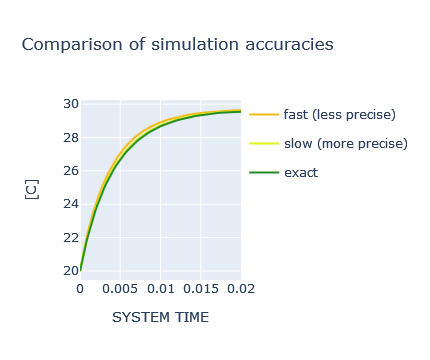

In [22]:
PlotlyHelper.combine_plots([p1, p2, p3], title="Comparison of simulation accuracies", xrange=[0, 0.02])

## The comparison reveals a gradient "less precise" -> "more precise" -> "exact" solution